# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

# 1. Quick Installations and importations

In [168]:
pip install mlxtend     

Note: you may need to restart the kernel to use updated packages.


In [169]:
pip install missingno

In [172]:
pip install lightgbm    

Note: you may need to restart the kernel to use updated packages.


In [173]:
#Importation of required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline               

OSError: dlopen(/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: image not found

# 2. Quick look at the dataset

In [127]:
#Read dataset
diabetes_df = pd.read_csv('/Users/cegrib/Downloads/diabetes-3.csv')  

In [128]:
diabetes_df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
#Let's see available columns and info about the dataset
diabetes_df.columns   

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [130]:
diabetes_df.info () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
diabetes_df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [132]:
#Check for nulls
diabetes_df.isnull().sum()   

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here, it appears there are no missing values. However, when we viewed the dataset earlier in [5], we saw that missing values had been replaced with 0, which is not biological correct in most cases. To address this, we will replace 0 value with NaN.

In [133]:
diabetes_df_new = diabetes_df.copy(deep = True)
diabetes_df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN) 

#Recheck for nulls
diabetes_df_new.isnull().sum()     

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

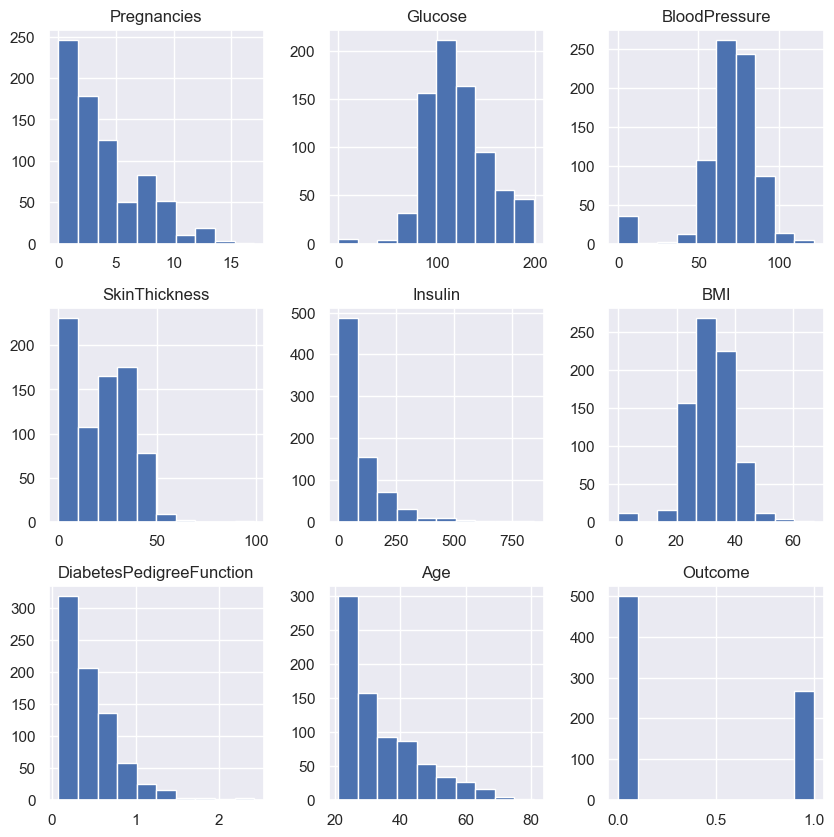

In [134]:
#Data distribution plots before removing or replacing nulls

p = diabetes_df.hist(figsize = (10,10))       

In [135]:
#Replace null values in a column with the mean value of that particular column
diabetes_df_new['Glucose'].fillna(diabetes_df_new['Glucose'].mean(), inplace = True)
diabetes_df_new['BloodPressure'].fillna(diabetes_df_new['BloodPressure'].mean(), inplace = True)
diabetes_df_new['SkinThickness'].fillna(diabetes_df_new['SkinThickness'].median(), inplace = True)
diabetes_df_new['Insulin'].fillna(diabetes_df_new['Insulin'].median(), inplace = True)
diabetes_df_new['BMI'].fillna(diabetes_df_new['BMI'].median(), inplace = True)    

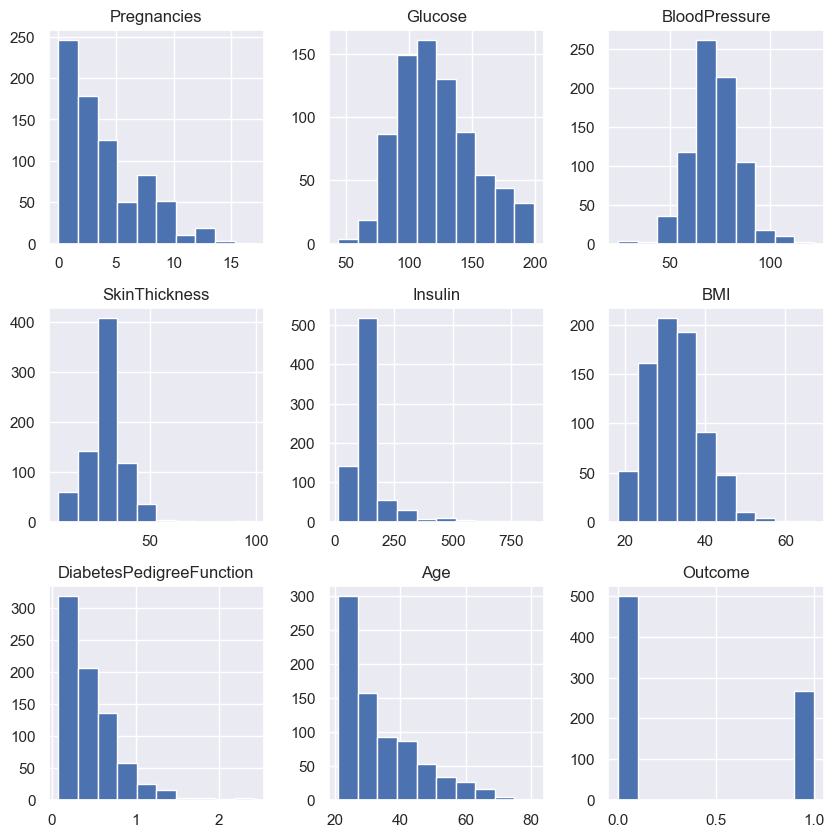

In [136]:
#Replot data distribution after replacing nulls with mean values
p = diabetes_df_new.hist(figsize = (10,10))        

In [137]:
#Final Null Count Analysis
diabetes_df_new.isnull().sum()       

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    500
1    268
Name: count, dtype: int64


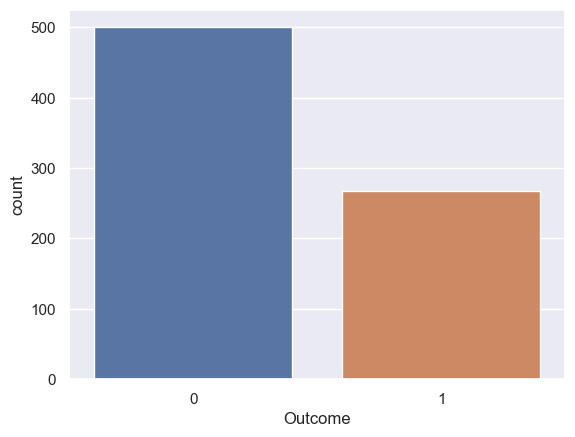

In [138]:
# Now let's check amd visualize the distribution of the outcome variable in the data.
# Outcome countplot
sns.countplot(x = 'Outcome',data = diabetes_df_new) 
print(diabetes_df_new.Outcome.value_counts())      

The dataset seems imbalance at 500:268; number of patients with 1 (diabetic) is almost half the patients with 0 (non-diabetic).

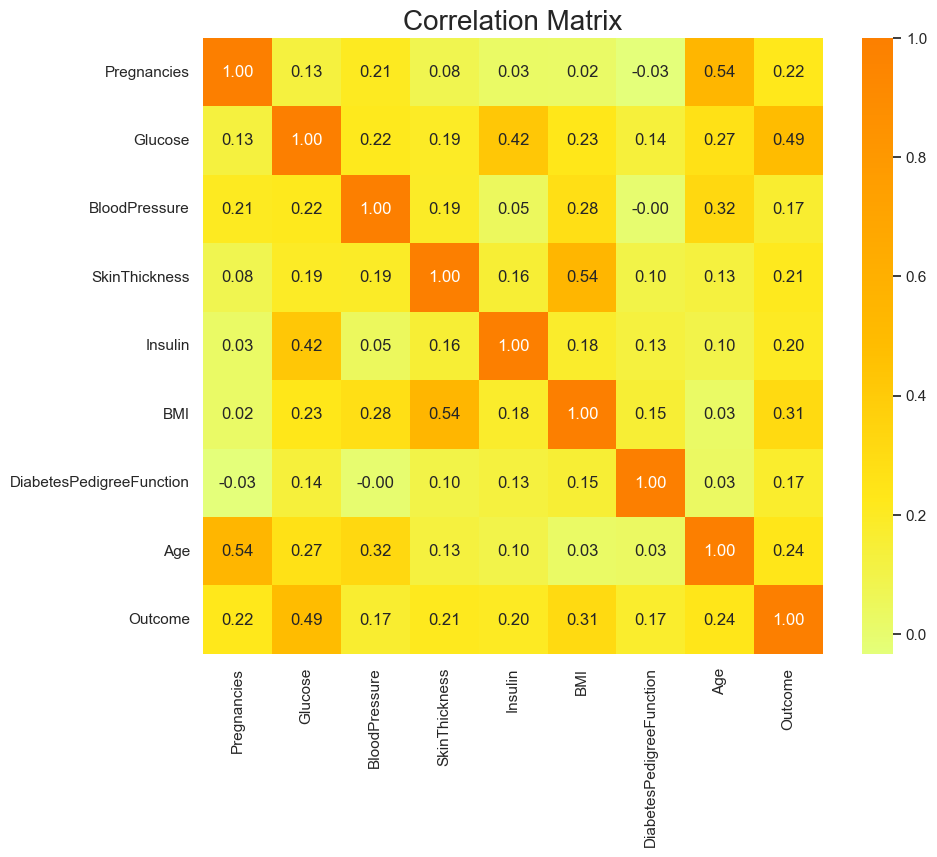

In [139]:
# Correlation matrix graph of the dataset
f, ax = plt.subplots(figsize= [10,8])
sns.heatmap(diabetes_df_new.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Wistia" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()         

# 3. Scaling the data

In [140]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_new.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


Scaling will will help the ML model to give a better result

# 4. Outlier Analysis

In [141]:
for feature in diabetes_df_new:
    Q1 = diabetes_df_new[feature].quantile(0.25)
    Q3 = diabetes_df_new[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabetes_df_new[(diabetes_df_new[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")  

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


All the independent variables (except glucose) have outliers

In [142]:
# Determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes_df_new)  

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [143]:
diabetes_df_new_scores = lof.negative_outlier_factor_
np.sort(diabetes_df_new_scores)[0:30]   

array([-3.30445978, -2.92355055, -2.48884101, -2.11712977, -2.10639247,
       -2.01096252, -1.95451646, -1.85895703, -1.85635277, -1.80461588,
       -1.76303893, -1.74754923, -1.7083314 , -1.61794121, -1.61146741,
       -1.6114475 , -1.59485319, -1.5883628 , -1.57982204, -1.56001231,
       -1.54747971, -1.54303907, -1.54193274, -1.52690503, -1.51916379,
       -1.51432101, -1.50402523, -1.50055984, -1.50037921, -1.49619189])

In [144]:
#Choose the threshold value according to lof scores
threshold = np.sort(diabetes_df_new_scores)[7]
threshold   

-1.8589570296505833

In [145]:
#Delete those that are higher than the threshold
outlier = diabetes_df_new_scores > threshold
diabetes_df_new = diabetes_df_new[outlier]       

In [146]:
#Let's recheck the size of the dataset
diabetes_df_new.shape  

(760, 9)

# 6. Feature Engineeering

In [147]:
# According to BMI column, some categorical variables were assigned.

NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
diabetes_df_new["NewBMI"] = NewBMI
diabetes_df_new.loc[diabetes_df_new["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 18.5) & (diabetes_df_new["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 24.9) & (diabetes_df_new["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 29.9) & (diabetes_df_new["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 34.9) & (diabetes_df_new["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes_df_new.loc[diabetes_df_new["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]  

diabetes_df_new.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [148]:
#According to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal" 
diabetes_df_new = diabetes_df_new.assign(NewInsulinScore=diabetes_df_new.apply(set_insulin, axis=1))     
diabetes_df_new.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity 1,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [149]:
#Glucose variables were assigned dummy variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
diabetes_df_new["NewGlucose"] = NewGlucose
diabetes_df_new.loc[diabetes_df_new["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes_df_new.loc[(diabetes_df_new["Glucose"] > 70) & (diabetes_df_new["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes_df_new.loc[(diabetes_df_new["Glucose"] > 99) & (diabetes_df_new["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes_df_new.loc[diabetes_df_new["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]     

In [150]:
diabetes_df_new.head()           

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity 1,Normal,Secret
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Normal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


# 7. Encoding

In [151]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
diabetes_df_new = pd.get_dummies(diabetes_df_new, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)           

In [152]:
diabetes_df_new.head()       

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,True,False,False,False,False,True,False,False,False,True
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,False,False,False,False,False,True,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [116]:
categorical_diabetes_df_new = diabetes_df_new[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Prediabetes']]      

In [153]:
categorical_diabetes_df_new.head()  

,NewBMI_Obesity 1,NewBMI_Obesity 1,NewBMI_Obesity 1,NewBMI_Obesity 1,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 2,NewBMI_Obesity 2,NewBMI_Obesity 2,NewBMI_Obesity 2,...,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Prediabetes,NewGlucose_Prediabetes,NewGlucose_Prediabetes,NewGlucose_Prediabetes,NewGlucose_Prediabetes
0,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
y = diabetes_df_new["Outcome"]
X = diabetes_df_new.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index 

In [155]:
X.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [156]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index) 

In [157]:
X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,-0.025324,0.857143,0.000000,0.144444,0.672313,1.235294
1,-0.4,-0.800,-0.400324,0.000000,0.000000,-0.633333,-0.046906,0.117647
2,1.0,1.650,-0.525324,0.000000,0.000000,-1.000000,0.789577,0.176471
3,-0.4,-0.700,-0.400324,-0.857143,-7.294118,-0.466667,-0.526384,-0.470588
4,-0.6,0.500,-2.025324,0.857143,10.117647,1.200000,5.000651,0.235294


In [159]:
X = pd.concat([X,categorical_diabetes_df_new], axis = 1)  

In [160]:
X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 1,...,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Prediabetes,NewGlucose_Prediabetes,NewGlucose_Prediabetes,NewGlucose_Prediabetes,NewGlucose_Prediabetes
0,0.6,0.775,-0.025324,0.857143,0.000000,0.144444,0.672313,1.235294,True,True,...,False,False,False,False,False,False,False,False,False,False
1,-0.4,-0.800,-0.400324,0.000000,0.000000,-0.633333,-0.046906,0.117647,False,False,...,True,True,True,True,True,False,False,False,False,False
2,1.0,1.650,-0.525324,0.000000,0.000000,-1.000000,0.789577,0.176471,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.4,-0.700,-0.400324,-0.857143,-7.294118,-0.466667,-0.526384,-0.470588,False,False,...,True,True,True,True,True,False,False,False,False,False
4,-0.6,0.500,-2.025324,0.857143,10.117647,1.200000,5.000651,0.235294,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
y.head() 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

# 6. Splitting the dataset

In [179]:
X = diabetes_df_new.drop('Outcome', axis=1)
y = diabetes_df_new['Outcome']  

In [178]:
#Split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=7)  


# Random Forest

In [180]:
#Building the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200)

In [181]:
#Now after building the model let’s check the accuracy of the model on the training dataset.

rfc_train = rfc.predict(X_train)
from sklearn import metrics 

In [182]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train))) 

Accuracy_Score = 1.0


The training dataset our model is overfitted.

In [183]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions))) 

Accuracy_Score = 0.7302631578947368


# 8. Decision Tree

In [184]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [185]:
#Getting the accuracy score for Decision Tree
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions))) 

Accuracy Score = 0.743421052631579


In [186]:
#Classification report and confusion matrix of the decision tree model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions)) 

[[84 18]
 [21 29]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       102
           1       0.62      0.58      0.60        50

    accuracy                           0.74       152
   macro avg       0.71      0.70      0.70       152
weighted avg       0.74      0.74      0.74       152



# 9. XgBoost classifier

In [188]:
pip install xgboost 

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/01/11/4840ff80f77a393ac929197b27335873c056e24e20231df97523786bcbf8/xgboost-2.0.0-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [189]:
#Building model using XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [190]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))
 

Accuracy Score = 0.743421052631579


# 10. Support Vector Machine (SVM)

In [191]:
#Building the model using Support Vector Machine (SVM)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train) 

SVC()

In [ ]:
#Prediction from support vector machine model on the testing data

In [192]:
svc_pred = svc_model.predict(X_test) 

In [194]:
#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred))) 

Accuracy Score = 0.7368421052631579


In [195]:
#Classification report and confusion matrix of the SVM classifier
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred)) 

[[87 15]
 [25 25]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       102
           1       0.62      0.50      0.56        50

    accuracy                           0.74       152
   macro avg       0.70      0.68      0.68       152
weighted avg       0.73      0.74      0.73       152



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

XgBoost classifier is the best model for this prediction since it has an accuracy_score of 0.74.

Feature importance: Shows how much each feature contributes to the model building phase. 

In [196]:
#Getting feature importances
rfc.feature_importances_ 

array([7.95501409e-02, 1.81577498e-01, 7.96088194e-02, 6.06116707e-02,
       6.90482856e-02, 1.33139179e-01, 1.09361340e-01, 1.22177557e-01,
       1.17225056e-02, 1.04241351e-02, 1.08669338e-02, 1.67174149e-02,
       2.63623469e-07, 1.01498464e-02, 1.35997549e-03, 2.09574850e-02,
       1.50411497e-02, 6.76857986e-02])

<Axes: >

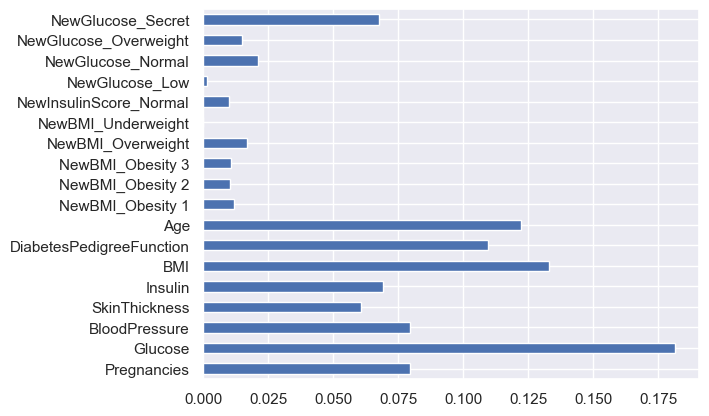

In [197]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')) 

Glucose as a feature is the most important in this dataset

# 1. Saving Model – Random Forest

In [198]:
import pickle 

In [199]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [200]:
diabetes_df_new.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,True,False,False,False,False,True,False,False,False,True
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,False,False,False,False,False,True,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [201]:
diabetes_df.tail() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
